<a href="https://www.kaggle.com/code/nadaaglan/ibm-hr-analytics-attrition-prediction?scriptVersionId=180245140" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
data= pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Data Describtion

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape[0]

1470

In [5]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
mask=data.isnull().any(axis=1)
data[mask]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [7]:
mask=data.isnull().any(axis=0)
cols_with_nan= data.columns[mask]
data[cols_with_nan]

#there's no null values, Sounds great XD

""
0
1
2
3
4
...
1465
1466
1467
1468


In [8]:
print(data['Attrition'].unique())
print(data['BusinessTravel'].unique())
print(data['Department'].unique())
print(data['EducationField'].unique())
print(data['Gender'].unique())
print(data['JobRole'].unique())
print(data['MaritalStatus'].unique())
print(data['Over18'].unique())
print(data['OverTime'].unique())

['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']
['Y']
['Yes' 'No']


# Data Vesualization

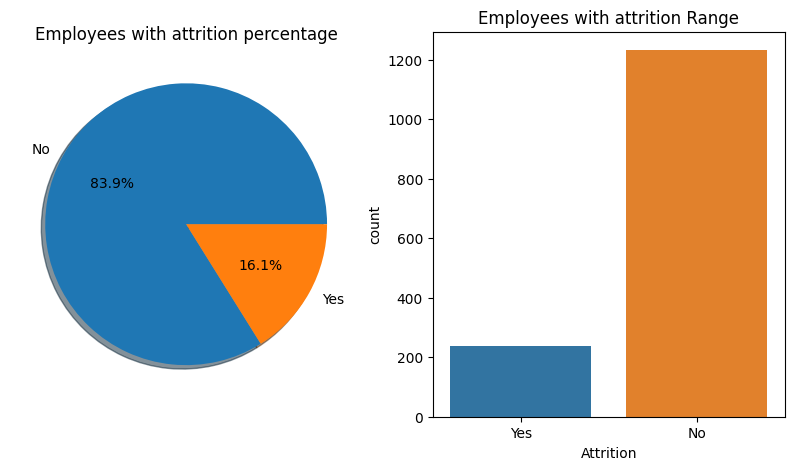

In [9]:
# Count labels
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
label_col = 'Attrition'  
if label_col in data.columns:
    label = data[label_col].value_counts().index
    label_count = data[label_col].value_counts().values
    plt.pie(x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
    plt.title('Employees with attrition percentage')
else:
    print(f"Column '{label_col}' not found in the DataFrame.")

plt.subplot(1, 2, 2)
sns.countplot(x=label_col, data=data)
plt.title('Employees with attrition Range')

plt.show()

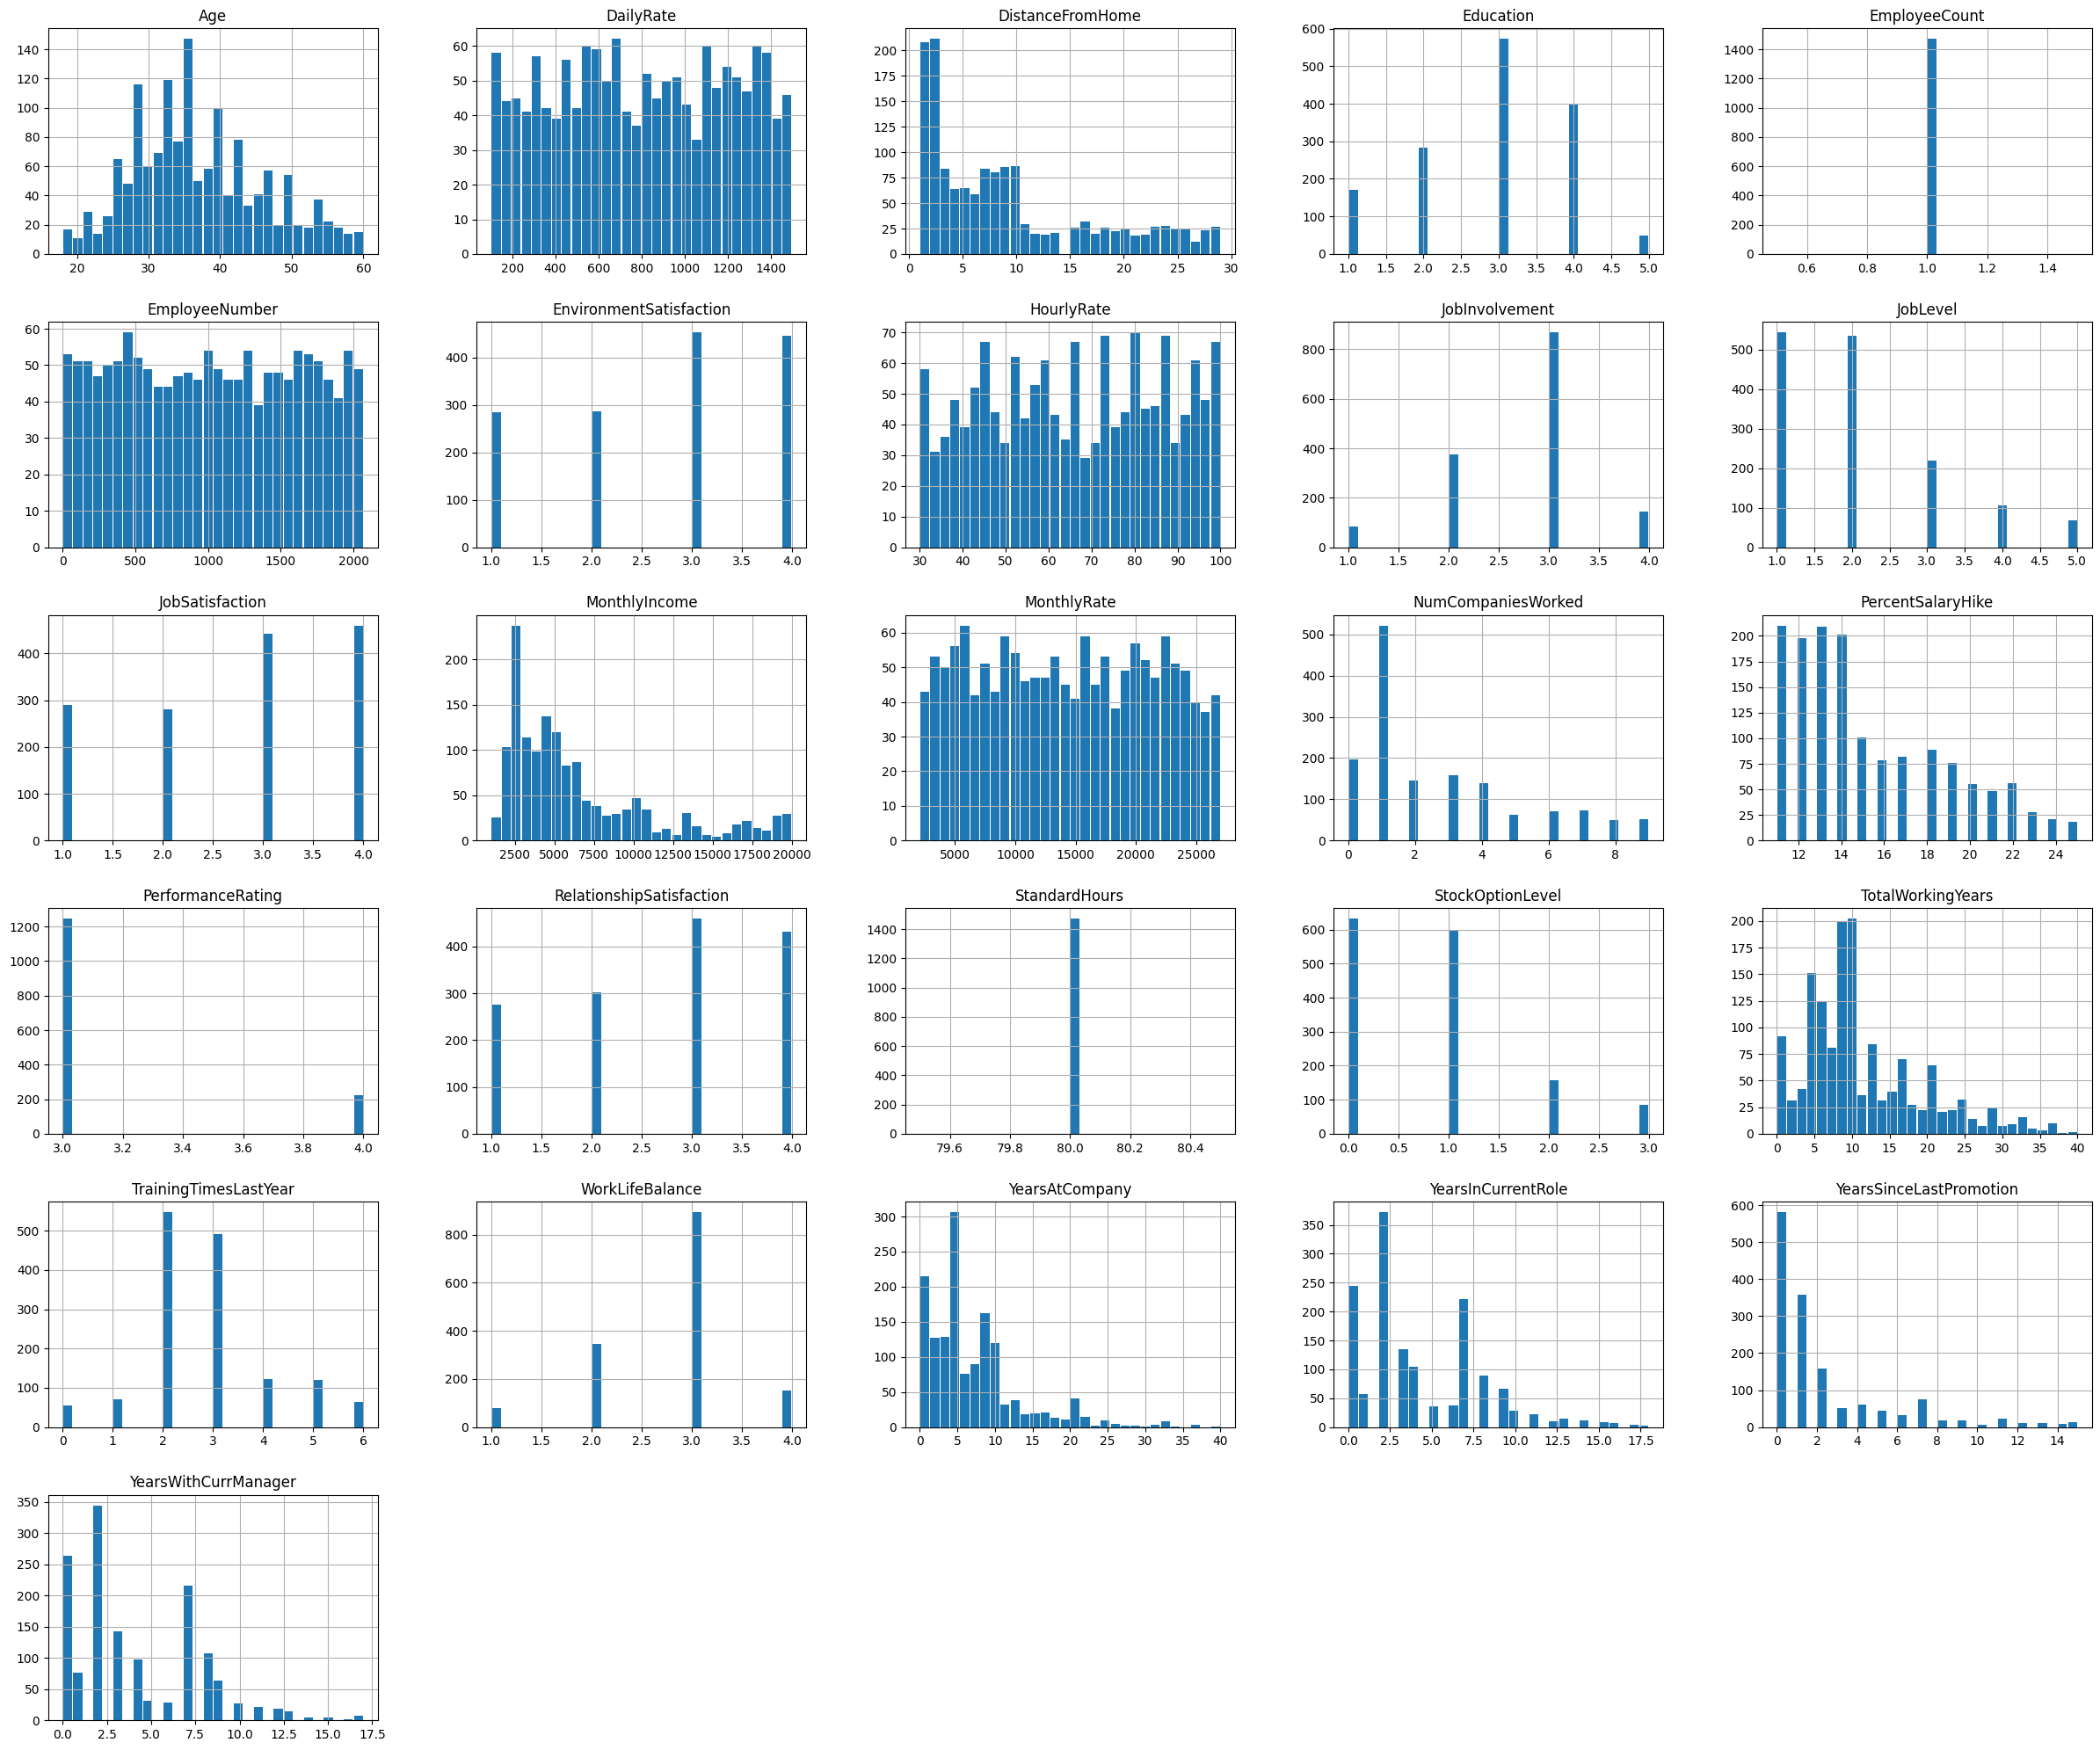

In [10]:
import matplotlib.pyplot as plt
# here we display the histogram of our dataset for more understanding of its details
# histogram will be displayed on numerical data so we will use data stored in data.  

import pandas as pd
import matplotlib.pyplot as plt

# Select only the numerical columns
numerical_columns = data.select_dtypes(include=['int', 'float']).columns

# Create histograms for the numerical columns
data[numerical_columns].hist(bins=30, figsize=(30, 25), rwidth=0.9)
plt.show()

# data_hot_encoded.hist(figsize=(30, 25), rwidth=0.9)
# plt.show()

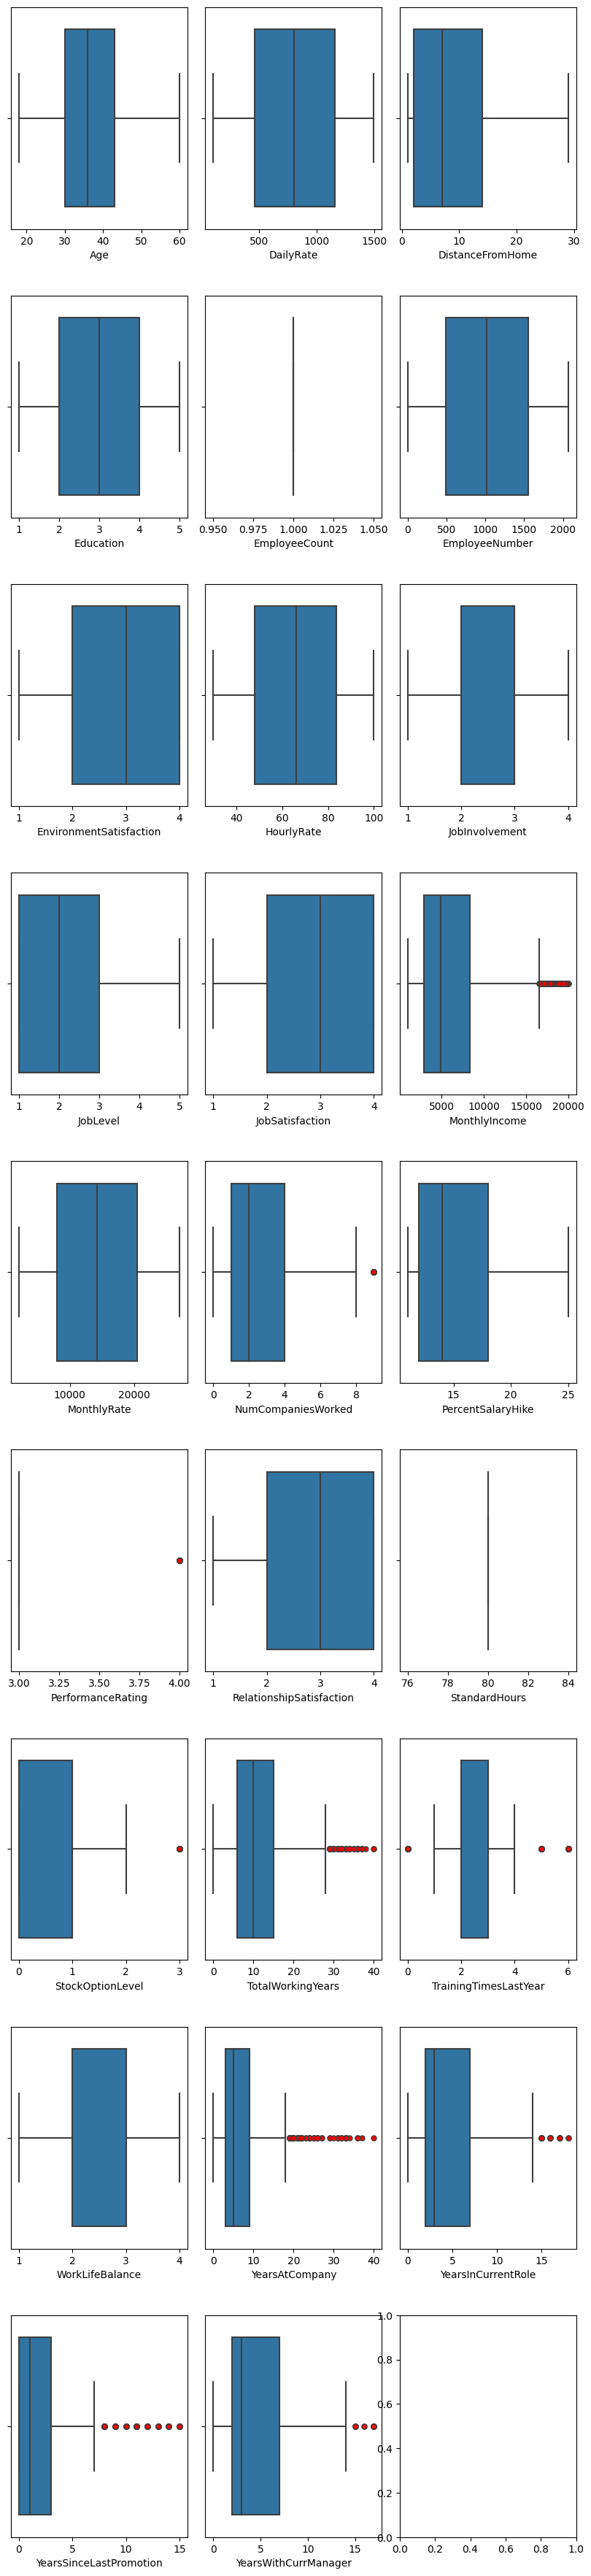

In [11]:
import seaborn as sns
# Get the numerical columns
numerical_cols = data.select_dtypes(include=["int64", "float64"]).columns
# Calculate the number of rows needed
nrows = (len(numerical_cols) + 1) // 3
# Create a figure with subplots
fig, axs = plt.subplots(nrows=nrows, ncols=3, figsize=(10, 5 * nrows))
# Create a box plot for each numerical column
for i, col in enumerate(numerical_cols):
    row_idx = i // 3
    col_idx = i % 3
    sns.boxplot(x=data[col], showfliers=True, flierprops={"marker": "o","markerfacecolor": "red", "markersize": 5}, ax=axs[row_idx, col_idx])
    axs[row_idx, col_idx].set_xlabel(col)
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.3)
# Show the figure
plt.show()

**we can see that there's an outlieres in our dataset in columns**                                         
(MonthlyIncome, NumCompaniesWorked, PerformanceRating, StockOptionalLevel, TotalWorkingYears, TrainingTimeLastYear, YearsAtCompany, YearsAtCurrentRole, YearsSinceLastPromotion, YearsWithCurentManager)

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

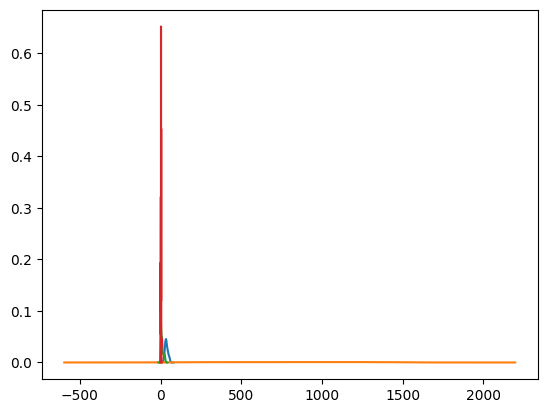

In [12]:
data.plot.density()



# Data Preprocessing

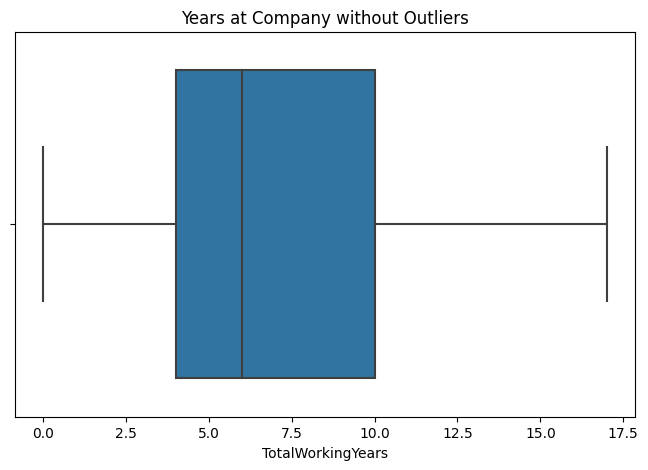

In [13]:
#Deleting the outliers
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.0 * IQR
    upper_bound = Q3 + 1.0 * IQR
    
    # Update the original DataFrame with outliers removed
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Show TotalWorkingYears column after removing outliers data
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["TotalWorkingYears"], showfliers=True, flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})
plt.title("Years at Company without Outliers")
plt.show()


In [14]:
data.shape[0]

532

In [15]:
# feature scaling using RobustScaler method
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
# Drop non-numeric columns and handle categorical variables
numeric_data = data.select_dtypes(include=['number'])
data_transformed = robust_scaler.fit_transform(numeric_data)
data_scaled = pd.DataFrame(data_transformed, columns=numeric_data.columns)


LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

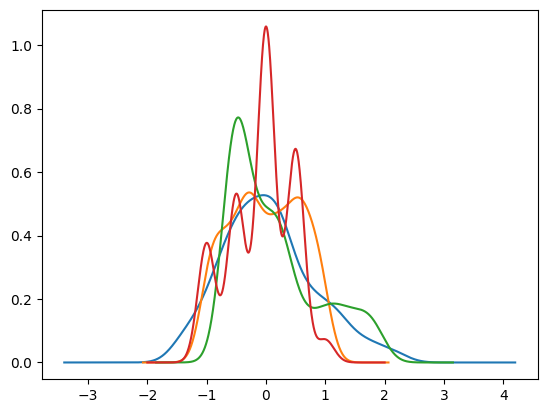

In [16]:
#representing the scaled data
data_scaled.plot.density()


In [17]:
data_scaled.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.4,0.844642,-0.5,-0.5,0.0,-0.974544,0.5,0.700000,-1.0,0.0,...,-0.5,0.0,-1.0,0.166667,1.0,0.0,-1.00,-0.888889,-1.0,-1.0
1,0.0,0.872822,-0.4,0.5,0.0,-0.973583,0.5,-0.328571,0.0,0.0,...,0.0,0.0,-1.0,0.333333,1.0,0.0,1.00,2.222222,2.0,-1.0
2,-0.1,0.298851,-0.5,-0.5,0.0,-0.970701,0.5,0.328571,0.0,0.0,...,0.0,0.0,-1.0,0.333333,0.0,-1.0,0.75,2.222222,2.0,2.0
3,-0.2,-0.197998,1.9,-1.0,0.0,-0.963016,-1.0,-1.042857,0.0,0.0,...,0.5,0.0,0.0,-0.166667,-1.0,-1.0,0.25,0.000000,3.0,0.5
4,0.1,0.804598,1.2,-0.5,0.0,-0.961095,-0.5,0.728571,0.0,0.0,...,0.0,0.0,0.0,-0.500000,0.0,0.0,-0.50,0.000000,0.0,0.0


**Applying numeric encoding**

In [18]:
data_encoded= data.replace({
    'Attrition': {'Yes': 1, 'No': 0},
   # 'BusinessTravel': {'Non-Travel': 0,'Travel_Rarely': 1,'Travel_Frequently': 2},
#     'Department': {'Sales': 0, 'Research & Development': 1, 'Human Resources': 3},
#     'EducationField': {'Life Sciences': 0, 'Other': 1, 'Medical': 2, 'Marketing': 3, 
#                        'Technical Degree': 4,'Human Resources': 5},
    'Gender':{'Female': 1, 'Male': 0},
#     'JobRole':{'Sales Executive': 1, 'Research Scientist': 2, 'Laboratory Technician': 3,
#                'Manufacturing Director': 4, 'Healthcare Representative': 5, 'Manager':6,
#                'Sales Representative':7, 'Research Director': 8, 'Human Resources': 9},
#     'MaritalStatus':{'Single': 0, 'Married': 1, 'Divorced': 2},
    'Over18':{'Y': 1},
    'OverTime':{'Yes':1, 'No':0}
    
})
data_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
12,31,0,Travel_Rarely,670,Research & Development,26,1,Life Sciences,1,16,...,4,80,1,5,1,2,5,2,4,3
13,34,0,Travel_Rarely,1346,Research & Development,19,2,Medical,1,18,...,3,80,1,3,2,3,2,2,1,2


**Applying One-hot encoding on nominal values**

In [19]:
data_hot_encoded= pd.get_dummies(data_encoded)

data_hot_encoded.replace({True: 1, False: 0}, inplace=True)

data_hot_encoded.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
2,37,1,1373,2,2,1,4,4,0,92,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,1,56,...,0,0,0,0,1,0,0,0,1,0
5,32,0,1005,2,2,1,8,4,0,79,...,1,0,0,0,0,0,0,0,0,1
12,31,0,670,26,1,1,16,1,0,31,...,0,0,0,0,1,0,0,1,0,0
13,34,0,1346,19,2,1,18,2,0,93,...,1,0,0,0,0,0,0,1,0,0


In [20]:
data_hot_encoded.dtypes

Age                                  int64
Attrition                            int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeCount                        int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
Gender                               int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
Over18                               int64
OverTime                             int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StandardHours                        int64
StockOptionLevel                     int64
TotalWorkin

**Spliting the dataset into input and output**

In [21]:
data_input = data_hot_encoded.drop(columns=['Attrition'])
data_output = data_hot_encoded['Attrition']

data_input.head()
#data_output.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
2,37,1373,2,2,1,4,4,0,92,2,...,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,1,5,4,1,56,3,...,0,0,0,0,1,0,0,0,1,0
5,32,1005,2,2,1,8,4,0,79,3,...,1,0,0,0,0,0,0,0,0,1
12,31,670,26,1,1,16,1,0,31,3,...,0,0,0,0,1,0,0,1,0,0
13,34,1346,19,2,1,18,2,0,93,3,...,1,0,0,0,0,0,0,1,0,0


# Balance the dataset

In [22]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
data_input, data_output = sm.fit_resample(data_input, data_output)

Text(0.5, 1.0, 'Employees with attrition Range')

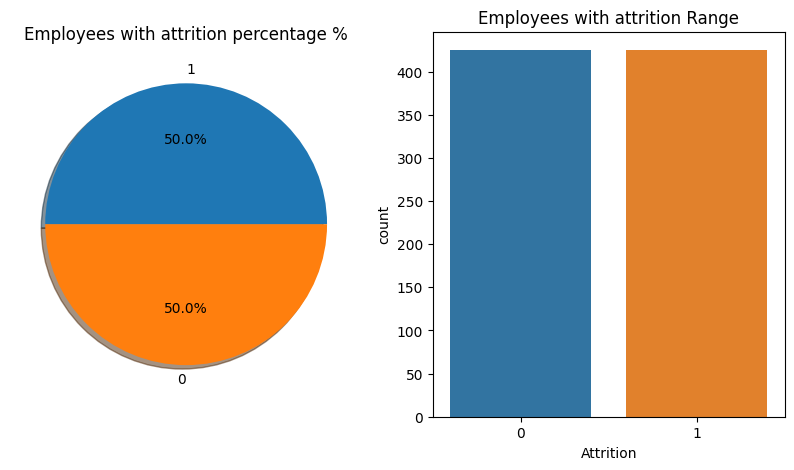

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns



# plt.subplot(1, 2, 1)
# label_col = 'Attrition'  
# if label_col in data.columns:
#     label = data[label_col].value_counts().index
#     label_count = data[label_col].value_counts().values
#     plt.pie(x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
#     plt.title('Employees with attrition percentage')
# else:
#     print(f"Column '{label_col}' not found in the DataFrame.")

# plt.subplot(1, 2, 2)
# sns.countplot(x=label_col, data=data)
# plt.title('Employees with attrition Range')

# plt.show()




dataset2 = pd.concat([data_input, data_output], axis=1)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
label_col = 'Attrition'
label = dataset2[label_col].value_counts().index
label_count = dataset2[label_col].value_counts().values
plt.pie(data= dataset2, x=label_count, labels=label,autopct='%1.1f%%',shadow=True, radius=1)
plt.title('Employees with attrition percentage %')
plt.subplot(1,2,2)
sns.countplot(x=label_col, data=dataset2)
plt.title('Employees with attrition Range')

In [24]:
from sklearn.model_selection import train_test_split

x,x_test,y,y_test= train_test_split(
    data_input, data_output, test_size=0.33,
    random_state=0)
x_train, x_val, y_train,y_val = train_test_split(
    x,y,test_size = 0.33, random_state = 0
)

In [25]:
print(x_train.shape)
print(y_train.shape)
print('------------------')
print(x_val.shape)
print(y_val.shape)
print('------------------')
print(x_test.shape)
print(y_test.shape)
print('------------------')

(381, 53)
(381,)
------------------
(188, 53)
(188,)
------------------
(281, 53)
(281,)
------------------


In [ ]:
# from sklearn.preprocessing import StandardScaler
# #from sklearn.preprocessing import MinMaxScaler

In [ ]:
# scaler = StandardScaler()
# #scaler = MinMaxScaler()
# scaler.fit(x_train)

# x_train_scaled = scaler.transform(x_train)
# x_val_scaled = scaler.transform(x_val)
# x_test_scaled = scaler.transform(x_test)

# x_train_scaled = pd.DataFrame(x_test_scaled, columns=x_train.columns)
# x_val_scaled = pd.DataFrame(x_val_scaled, columns=x_train.columns)
# x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_train.columns)

In [ ]:
x_train_scaled[:5]

In [ ]:
y_train.value_counts()

# Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB

In [27]:
from sklearn.metrics import accuracy_score

# A helper function to evaluate a model
def model_evaluate(model, x_train, y_train, x_val, y_val):
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_val = model.predict(x_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    return acc_train, acc_val

In [28]:
model = GaussianNB()
model_evaluate(model, x_train, y_train, x_val, y_val)

(0.8083989501312336, 0.824468085106383)

In [29]:
models_list = [
    GaussianNB(),
    MultinomialNB(),
    ComplementNB(),
    BernoulliNB(),
]

# for each model
for model in models_list:
    # evaluate the model and calculate acc_train and acc_val
    acc_train, acc_val = model_evaluate(
        model,
        x_train,
        y_train,
        x_val,
        y_val
    )
    # Display model name with acc_train and acc_val
    print(model.__class__.__name__)
    print(acc_train, acc_val)
    print('--------------------------')

GaussianNB
0.8083989501312336 0.824468085106383
--------------------------
MultinomialNB
0.5958005249343832 0.5851063829787234
--------------------------
ComplementNB
0.5958005249343832 0.5851063829787234
--------------------------
BernoulliNB
0.84251968503937 0.8297872340425532
--------------------------


In [30]:
# Storing models in a list to loop through them
models_list = [
    GaussianNB(),
    MultinomialNB(),
    ComplementNB(),
    BernoulliNB(),
]

# creating a dictionary to store results
results_dict = {
    'model_name': [],
    'acc_train': [],
    'acc_val': [],
}

# for each model
for model in models_list:
    # evaluate the model and calculate acc_train and acc_val
    acc_train, acc_val = model_evaluate(
        model,
        x_train,
        y_train,
        x_val,
        y_val
    )
    
    # storing results in results_dict
    results_dict['model_name'].append(model.__class__.__name__)
    results_dict['acc_train'].append(acc_train)
    results_dict['acc_val'].append(acc_val)
    
# converting results_dict to a DataFrame
results_df = pd.DataFrame(results_dict)
results_df

,model_name,acc_train,acc_val
0,GaussianNB,0.808399,0.824468
1,MultinomialNB,0.595801,0.585106
2,ComplementNB,0.595801,0.585106
3,BernoulliNB,0.842520,0.829787


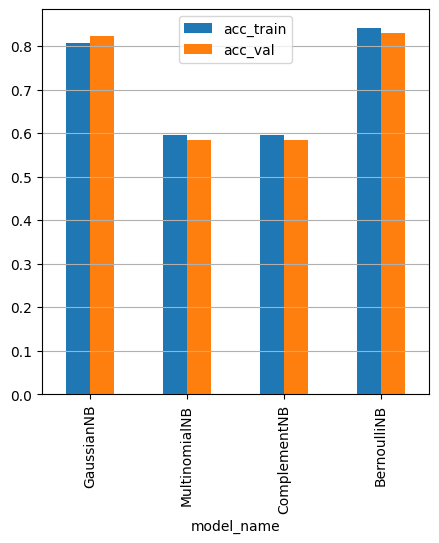

In [31]:

import matplotlib.pyplot as plt
%matplotlib inline

results_df.plot.bar(x='model_name', y=['acc_train', 'acc_val'], figsize=(5, 5))
plt.grid(axis='y')
plt.show()

In [32]:
best_model = BernoulliNB()
best_model.fit(x_train, y_train)
y_pred_test = best_model.predict(x_test)
accuracy_score(y_test, y_pred_test)

0.8505338078291815

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Confusion Matrix:
 [[124  15]
 [ 27 115]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86       139
           1       0.88      0.81      0.85       142

    accuracy                           0.85       281
   macro avg       0.85      0.85      0.85       281
weighted avg       0.85      0.85      0.85       281



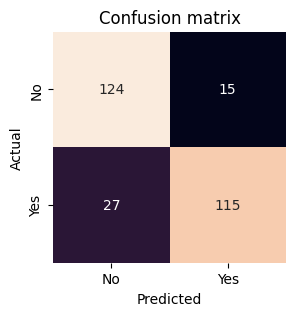

Precision: [0.82119205 0.88461538]
Recall: [0.89208633 0.80985915]
F1-score: [0.85517241 0.84558824]


In [34]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have calculated the confusion matrix
confusion_matrix_array = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix_array,
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'],
            annot=True, fmt='g',
            cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

# Calculate precision, recall, and F1-score of the classifier
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_test)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [36]:
# Train the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(x_train, y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [37]:
# Calculating accuracy of training
y_pred_train = model.predict(x_train)
accuracy_score(y_train, y_pred_train)

0.8293963254593176

In [38]:
# Evaluate the model
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 80.43%


In [39]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[115  24]
 [ 31 111]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       139
           1       0.82      0.78      0.80       142

    accuracy                           0.80       281
   macro avg       0.80      0.80      0.80       281
weighted avg       0.81      0.80      0.80       281



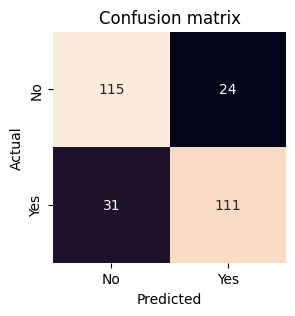

Precision: [0.78767123 0.82222222]
Recall: [0.82733813 0.78169014]
F1-score: [0.80701754 0.80144404]


In [40]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have calculated the confusion matrix
confusion_matrix_array = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix_array,
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'],
            annot=True, fmt='g',
            cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

# Calculate precision, recall, and F1-score of the classifier
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)


# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
model=DecisionTreeClassifier(max_depth=7,random_state=2)

In [43]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=2)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
y_pred_train=model.predict(x_train)
y_pred_val=model.predict(x_val)

In [46]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_val,y_pred_val))


0.984251968503937
0.8297872340425532


In [47]:
max_depth_values=[1,2,3,4,5,6,7,8]
train_accuracy_values=[]
val_accuracy_values=[]

for max_depth_val in max_depth_values:
    model=DecisionTreeClassifier(max_depth=max_depth_val,random_state=2)
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_val=model.predict(x_val)
    acc_train=accuracy_score(y_train,y_pred_train)
    acc_val=accuracy_score(y_val,y_pred_val)
    train_accuracy_values.append(acc_train)
    val_accuracy_values.append(acc_val)
    
    

In [48]:
train_accuracy_values

[0.6955380577427821,
 0.7506561679790026,
 0.8267716535433071,
 0.8713910761154856,
 0.926509186351706,
 0.9711286089238845,
 0.984251968503937,
 0.9973753280839895]

In [49]:
val_accuracy_values

[0.6968085106382979,
 0.75,
 0.7925531914893617,
 0.8297872340425532,
 0.824468085106383,
 0.8297872340425532,
 0.8297872340425532,
 0.7925531914893617]

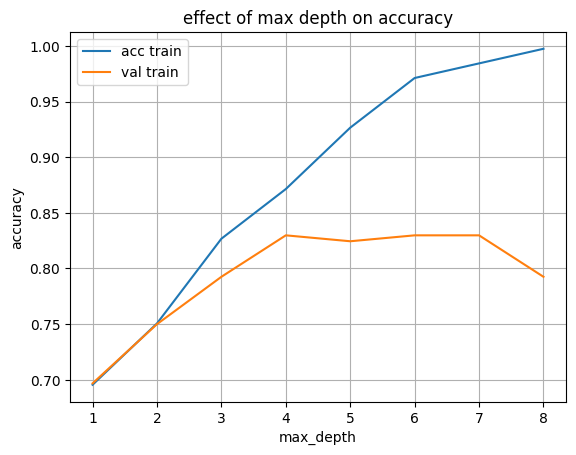

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(max_depth_values,train_accuracy_values,label='acc train')
plt.plot(max_depth_values,val_accuracy_values,label='val train')
plt.legend()
plt.grid(axis='both')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('effect of max depth on accuracy')
plt.show()



In [51]:
model_best=DecisionTreeClassifier(max_depth=4,random_state=2)
model_best.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=2)

In [52]:
y_pred_test=model_best.predict(x_test)
print(accuracy_score(y_pred_test,y_test))

0.7686832740213523


In [53]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Confusion Matrix:
 [[110  29]
 [ 36 106]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       139
           1       0.79      0.75      0.77       142

    accuracy                           0.77       281
   macro avg       0.77      0.77      0.77       281
weighted avg       0.77      0.77      0.77       281



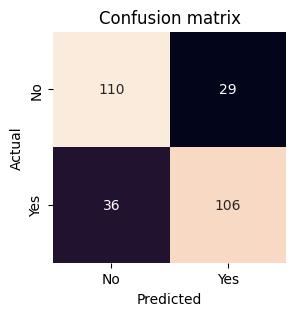

Precision: [0.75342466 0.78518519]
Recall: [0.79136691 0.74647887]
F1-score: [0.77192982 0.76534296]


In [54]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have calculated the confusion matrix
confusion_matrix_array = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix_array,
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'],
            annot=True, fmt='g',
            cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

# Calculate precision, recall, and F1-score of the classifier
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_test)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)


# KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

# Creating model
model = KNeighborsClassifier(n_neighbors= 5)

# Training
model.fit(x_train, y_train)

KNeighborsClassifier()

In [56]:
# Calculating accuracy of training
y_pred_train = model.predict(x_train)
accuracy_score(y_train, y_pred_train)

0.7874015748031497

In [57]:
# Calculating accuracy of test
y_pred_test = model.predict(x_test)
accuracy_score(y_test, y_pred_test)

0.6832740213523132

In [58]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Confusion Matrix:
 [[ 87  52]
 [ 37 105]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.63      0.66       139
           1       0.67      0.74      0.70       142

    accuracy                           0.68       281
   macro avg       0.69      0.68      0.68       281
weighted avg       0.69      0.68      0.68       281



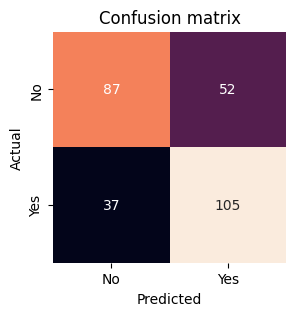

Precision: [0.7016129  0.66878981]
Recall: [0.62589928 0.73943662]
F1-score: [0.66159696 0.70234114]


In [59]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have calculated the confusion matrix
confusion_matrix_array = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix_array,
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'],
            annot=True, fmt='g',
            cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

# Calculate precision, recall, and F1-score of the classifier
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_test)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
